In [4]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from IPython.display import Video
%matplotlib widget
plt.style.use('dark_background')
from scipy.integrate import quad
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton


In [5]:
A = SlabExact(symmetric=True)

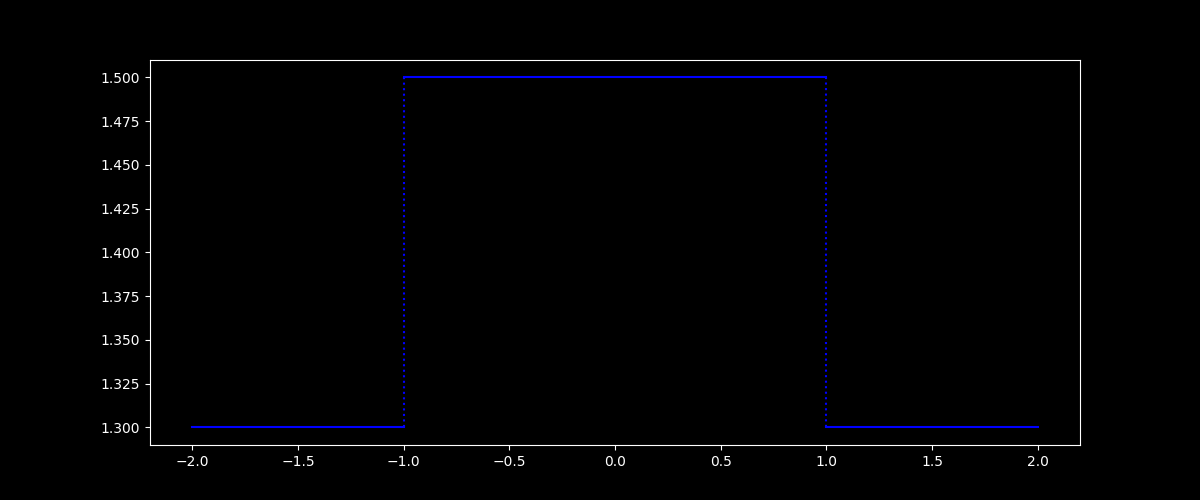

In [6]:
A.plot_refractive_index()

In [42]:
def dirac(x, tol=.007):
    return 2/tol * np.where(np.abs(x)<= tol,1,0)
    
def dirac_exact(beta, field_type='TE', sign='+1', phase=None):
    M = A.coefficients(beta, up_to_region=1, field_type=field_type, mode_type='radiation',
                      sign=sign, phase=phase)
    return beta/(2*A.K0)*np.sum(M[..., 1], axis=len(M[..., 1].shape)-1)

def f(x):
    return 1-x**2

def g(x):
    return np.exp(-x**2)

def quadratic_piecewise(x):
    conds = [(x<-1), ((-1<=x)*(x<=1)), (x>1)]
    funcs = [0, lambda x: 1-x**2, 0]
    return np.piecewise(x, conds, funcs)

def quadratic_piecewise2d(x, zs=None, wavenumber=A.K0):
    conds = [(x<-1), ((-1<=x)*(x<=1)), (x>1)]
    funcs = [0, lambda x: 1-x**2, 0]
    fx = np.piecewise(x, conds, funcs)
    fz = np.exp(1j * wavenumber * zs)
    return np.outer(fz, fx)

In [43]:
xs = np.linspace(-5,5,2000)

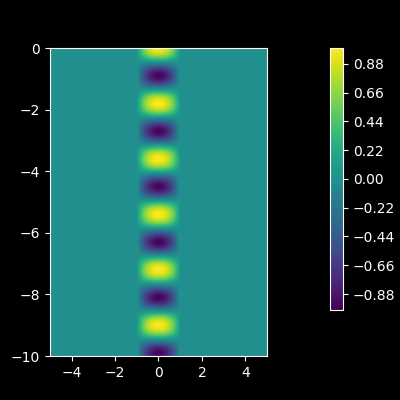

In [46]:
A.plot_field_2d(quadratic_piecewise2d, xs=xs, zmin=-10, zmax=0, zref=100)

In [6]:
plt.close('all')
# plt.plot(xs, quadratic_piecewise(xs))
# plt.plot(xs, f(xs))

In [7]:
Propagator = A.propagator()

## Propagation for 1-x^2

In [8]:
P = Propagator(f0=quadratic_piecewise, Lx=-1, Rx=1, LZ=0, RZ=50, NZ=600)

0 / 600
1 / 600
2 / 600
3 / 600
4 / 600
5 / 600
6 / 600
7 / 600
8 / 600
9 / 600
10 / 600
11 / 600
12 / 600
13 / 600
14 / 600
15 / 600
16 / 600
17 / 600
18 / 600
19 / 600
20 / 600
21 / 600
22 / 600
23 / 600
24 / 600
25 / 600
26 / 600
27 / 600
28 / 600
29 / 600
30 / 600
31 / 600
32 / 600
33 / 600
34 / 600
35 / 600
36 / 600
37 / 600
38 / 600
39 / 600
40 / 600
41 / 600
42 / 600
43 / 600
44 / 600
45 / 600
46 / 600
47 / 600
48 / 600
49 / 600
50 / 600
51 / 600
52 / 600
53 / 600
54 / 600
55 / 600
56 / 600
57 / 600
58 / 600
59 / 600
60 / 600
61 / 600
62 / 600
63 / 600
64 / 600
65 / 600
66 / 600
67 / 600
68 / 600
69 / 600
70 / 600
71 / 600
72 / 600
73 / 600
74 / 600
75 / 600
76 / 600
77 / 600
78 / 600
79 / 600
80 / 600
81 / 600
82 / 600
83 / 600
84 / 600
85 / 600
86 / 600
87 / 600
88 / 600
89 / 600
90 / 600
91 / 600
92 / 600
93 / 600
94 / 600
95 / 600
96 / 600
97 / 600
98 / 600
99 / 600
100 / 600
101 / 600
102 / 600
103 / 600
104 / 600
105 / 600
106 / 600
107 / 600
108 / 600
109 / 600
110 / 600


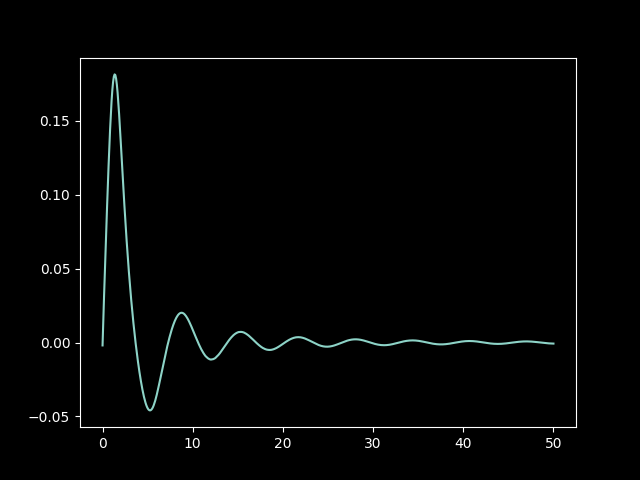

In [9]:
plt.close('all')
plt.plot(P.Zs, P.alphas.real);


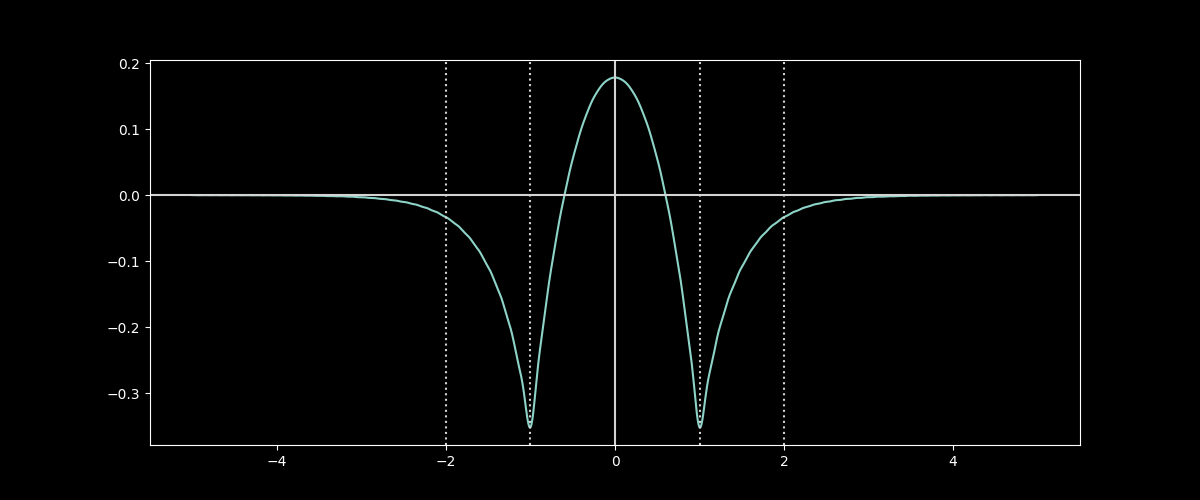

In [10]:
plt.close('all')
A.plot_field_1d(P.slice_propagate, xs=xs)

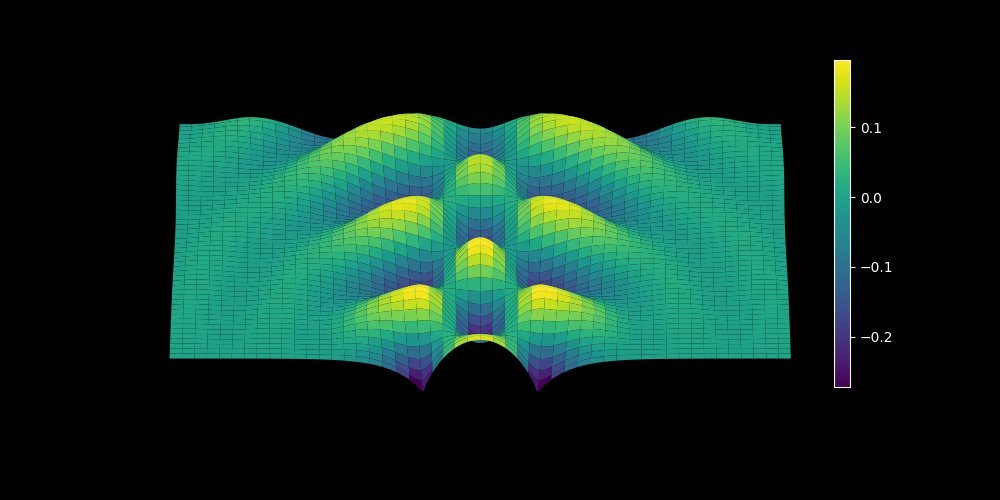

In [11]:
A.plot_field_2d(P.propagate, xs=xs, surface=True, part='real', zoom=2)

## Guided Modes

In [12]:
field_type = 'TE'
mode_type = 'guided'

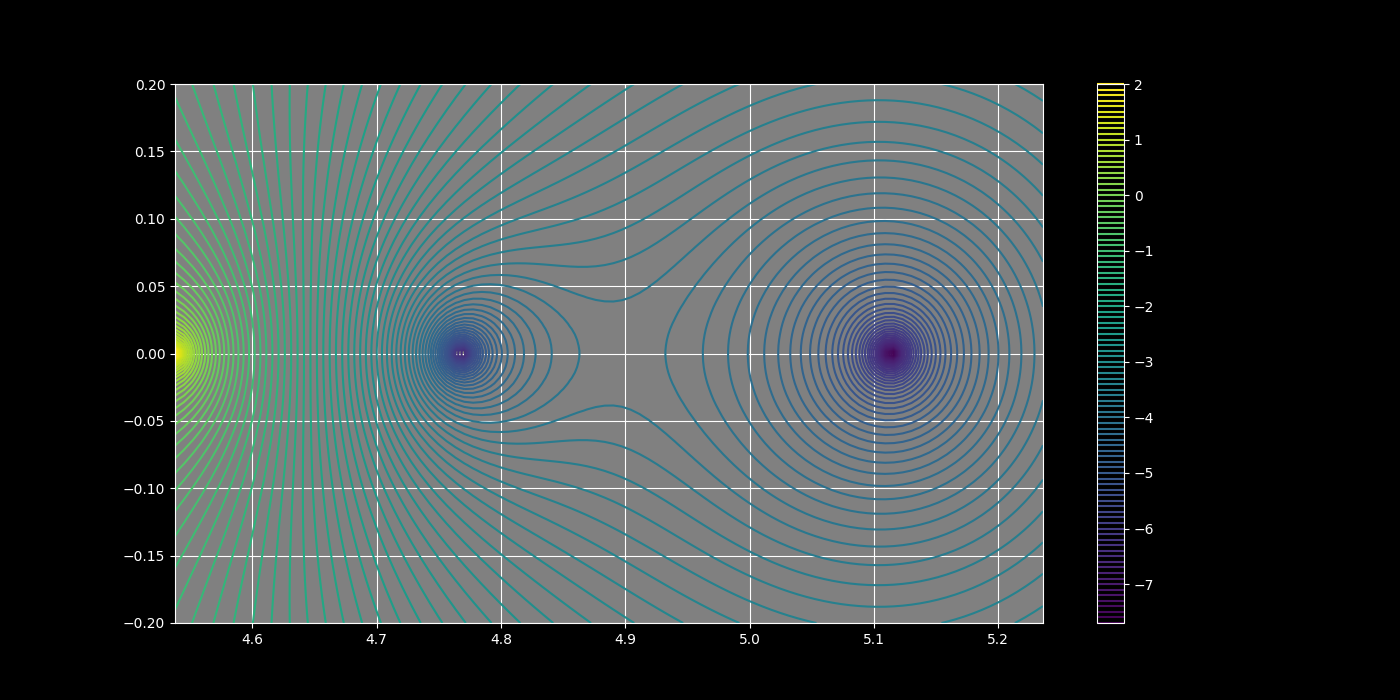

In [13]:
plotlogf(A.determinant, A.K_low, A.K_high, -.2, .2, field_type, mode_type, iref=100, rref=100,levels=100)

In [14]:
beta = newton(A.determinant, 5.1, args=('TE', mode_type))

F = A.fields(beta, field_type=field_type, mode_type=mode_type)

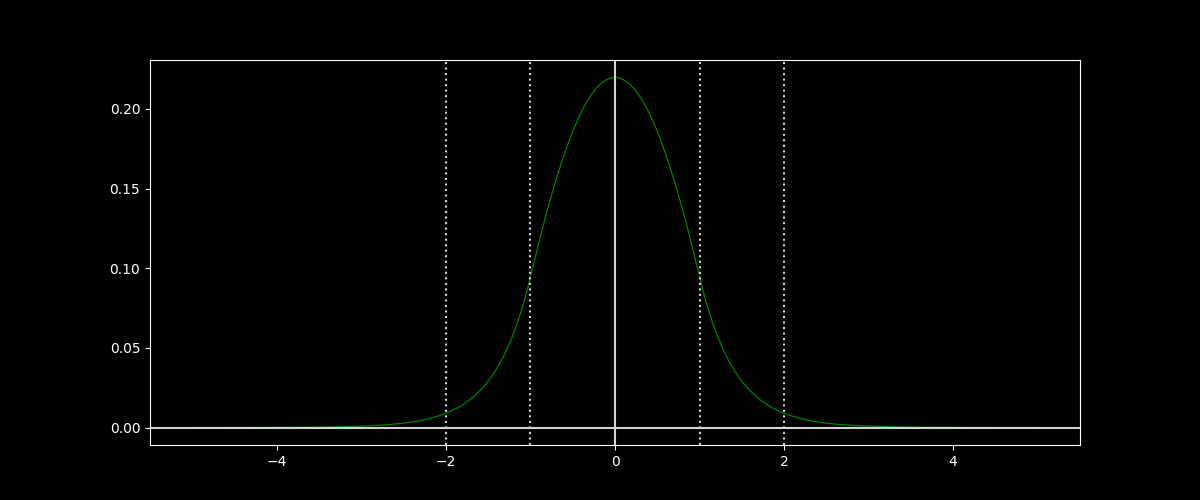

In [15]:
A.plot_field_1d(F, xs=xs, plot_axis=True, linewidth=.9, color='g',plot_regions=False)


In [16]:
integrand = lambda x: F(x) * F(x).conjugate()
cf1 = quad(integrand, -35,35, complex_func=True)[0].real

integrand = lambda x: P.f0(x) * F(x).conjugate()
cf2 = quad(integrand, -1,1, complex_func=True)[0].real

alpha = cf2/cf1

In [17]:
full = lambda x: P.slice_propagate(x) + alpha * F(x)
Full = lambda x, zs: P.propagate(x, zs=zs) + alpha * F(x, zs=zs)

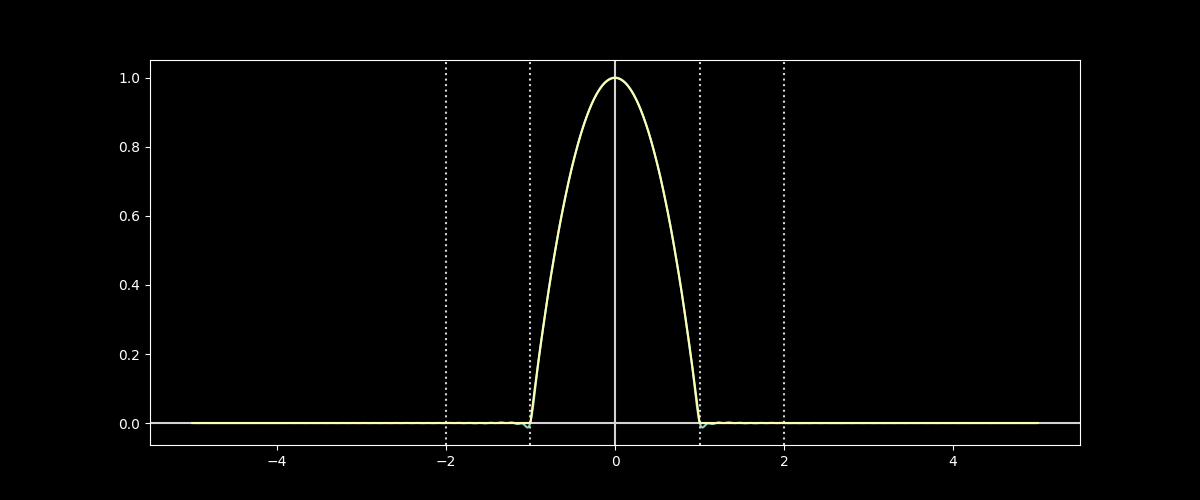

In [18]:
A.plot_field_1d(full, xs=xs, part='real')
ax = plt.gca()
A.add_1d_plot(ax, quadratic_piecewise, xs=xs)

In [51]:
def line(xs, val=0):
    return val * np.ones_like(xs)

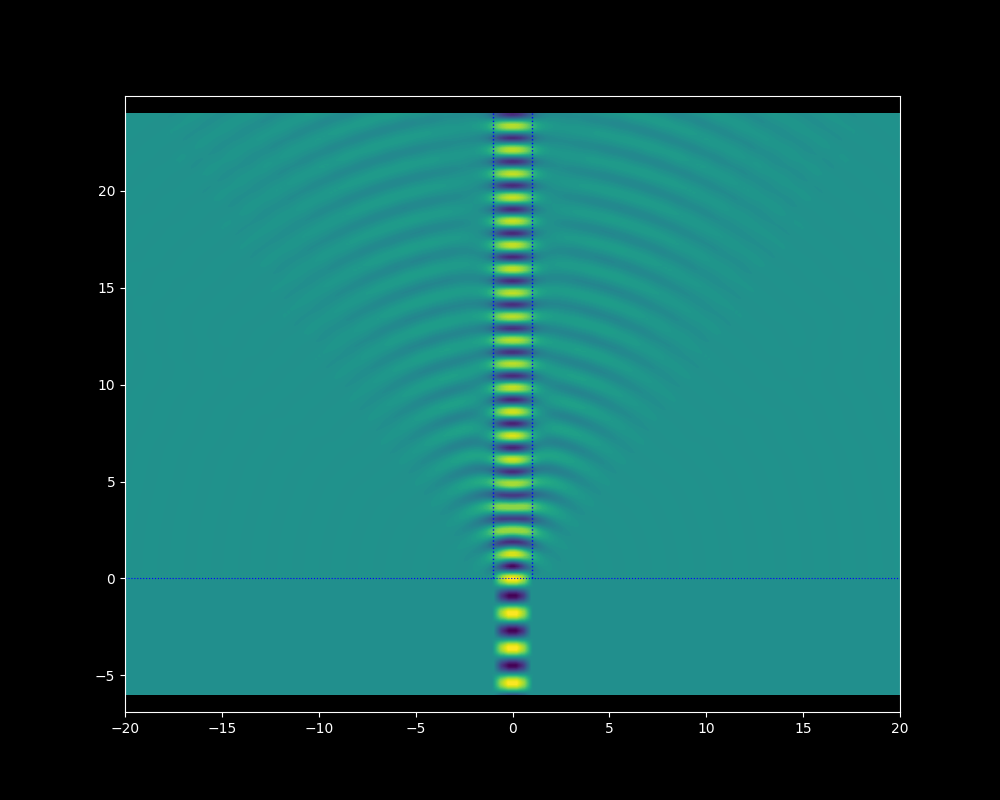

In [76]:
A.plot_field_2d(Full, xs=np.linspace(-20,20,200), colorbar=False, figsize=(10,8),
                zmax=24, zref=200,
               )
ax = plt.gca()
A.add_2d_plot(ax, quadratic_piecewise2d, xs=np.linspace(-20,20,100), zs=np.linspace(-6, 0, 100))
A.add_1d_plot(ax, line, xs=np.linspace(-20,20,100), color='b', linewidth=.8, linestyle=':')
ax.plot([-1, -1], [0, 24], color='b', linewidth=1, linestyle=':')
ax.plot([1, 1], [0, 24], color='b', linewidth=1, linestyle=':');
plt.axis('equal');

In [ ]:
A.plot_field_2d(F, xs=np.linspace(-20,20,800), colorbar=False, figsize=(10,5),
                zmax=-16, zref=300,
               )